In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [7]:
df=pd.read_csv("AirPassengers.csv" ,parse_dates = ['Month'], index_col=['Month'])

In [12]:
df["random_ts"] = np.random.rand(df.shape[0])


In [13]:
df.head()

,#Passengers,random_ts
Month,,
1949-01-01,112,0.181496
1949-02-01,118,0.925171
1949-03-01,132,0.298106
1949-04-01,129,0.301643
1949-05-01,121,0.838085


<Axes: xlabel='Month'>

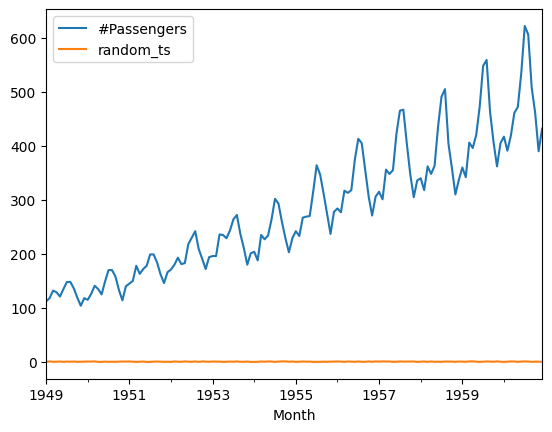

In [14]:
df.plot()

In [18]:
X=df.drop(columns="random_ts")
y=df["random_ts"]

**TimeSeriesSplit**

Think of `TimeSeriesSplit` as the reliable timekeeper of your data splits. It divides your data into sequential folds, ensuring each training set is formed from past data and each test set from future data.

In [21]:
from sklearn.model_selection import TimeSeriesSplit
tsv=TimeSeriesSplit(n_splits=5)
for train_index , test_index in tsv.split(X):
     X_train, X_valid=X.iloc[train_index],X.iloc[test_index]
     y_train,y_valid=y.iloc[train_index],y.iloc[test_index]

**Sliding/Rolling Window Split**

In the rolling window approach, your model moves forward in time with a fixed-size training window that slides along your dataset. It’s like taking steps into the future while always keeping an eye on the past.


In [ ]:
for date in pd.range_date("1949-01-01","1949-12-31",freq="M"):
     train_start=date-pd.offsets.MonthBegin(1)
     train_end=date-pd.offsets.Day(1)
     
      
     valid_start = date
     valid_end = date + pd.offsets.MonthEnd(1)

     train = series.loc[train_start:train_end]
     valid = series.loc[valid_start:valid_end]